# Пример. EDA (исследовательский анализ данных)
<font size=4>
<b>Цель проекта:</b> обработка данных, анализ и определение факторов, влияющих на выпадение осадков.</font>

# Инициализация проекта

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings

In [69]:
data= pd.read_csv('weatherAUS.csv')

# Исследование исходных данных

<font size=4>
Датасет содержит следующие поля:

- `data` — дата наблюдения
- `location` — место погодной станции
- `mintemp` — минимальная температура
- `maxtemp` — максимальная температура
- `rainfall` — осадки
- `evaporation` — испарения
- `sunshine` — ясная погода в часах
- `windguestdir` — направление сильнейшего порыва ветра
- `windgustspeed` — скорость сильнейшего порыва ветра
- `winddir9am` —  направление ветра в 9 утра
- `winddir3pm` —  направление ветра в 3 вечера
- `humidity9am` —  влажность в 9 утра
- `humidity3pm` —  влажность в 3 вечера
- `pressure9am` — давление 9 в утра  
- `pressure3pm` — давление в 3 вечера
- `windspeed9am` - скорость ветра в 9 утра
- `windspeed3pm` - скорость ветра в 3 вечера
- `cloud9am` — облачность в 9 утра
- `cloud3pm` — облачность в 3 вечера
- `temp9am` — температура в 9 утра
- `temp3pm` — температура в 3 вечера
- `raintoday` — был дождь сегодня
- `raintomorrow` — был дождь на следующий день
</font>

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [71]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Date              0.000000
Location          0.000000
dtype: float64

In [72]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [73]:
data['Evaporation'].value_counts()


Evaporation
4.0     3339
8.0     2609
2.2     2095
2.0     2032
2.4     2003
        ... 
50.8       1
41.8       1
50.2       1
42.8       1
39.6       1
Name: count, Length: 358, dtype: int64

In [74]:
data['Sunshine'].value_counts()

Sunshine
0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: count, Length: 145, dtype: int64

In [75]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [76]:
data['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [77]:
def groupbyLocationAndCategoryMean(data, category):
    data_grouped = data.groupby('Location')[category].transform('mean')
    data[category] = data[category].fillna(data_grouped)
    
def globalCategoryMean(data, category):
    global_mean = data[category].mean()
    data[category] = data[category].fillna(global_mean) 
    
def groupbyLocationAndCategoryMode(data, category):
    data_grouped = data.groupby('Location')[category].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    data[category] = data[category].fillna(data_grouped)
    
def globalCategoryMode(data, category):
    global_mode = data[category].mode().iloc[0] if not data[category].mode().empty else None
    data[category] = data[category].fillna(global_mode)

In [78]:
for column in data.columns:
    if data[column].isnull().any():
        try:
            groupbyLocationAndCategoryMean(data, column)
            if data[column].isnull().any():
                globalCategoryMean(data, column)
        except:
            try:
                groupbyLocationAndCategoryMode(data, column)
                if data[column].isnull().any():
                    globalCategoryMode(data, column)
            except:
                print(f'{column} error')

In [79]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False).any()

np.False_

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [81]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.44227,7.636766,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,5.406447,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.44227,7.636766,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,6.391001,5.406447,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.44227,7.636766,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,6.391001,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.44227,7.636766,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,6.391001,5.406447,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.44227,7.636766,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,5.44227,7.636766,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,6.391001,5.406447,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,5.44227,7.636766,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.000000,5.406447,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,5.44227,7.636766,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,6.391001,5.406447,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,5.44227,7.636766,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,6.391001,5.406447,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,5.44227,7.636766,W,28.0,S,...,58.0,27.0,1007.0,1005.7,6.391001,5.406447,20.1,28.2,Yes,No


In [82]:
data['MinTemp'] = (data['MinTemp'] * 10).astype(int)
data['MaxTemp'] = (data['MaxTemp'] * 10).astype(int)
data['Rainfall'] = (data['Rainfall'] * 10).astype(int)
data['Evaporation'] = (np.round(data['Evaporation'], 1) * 10).astype(int)
data['Sunshine'] = (np.round(data['Sunshine'], 1) * 10).astype(int)
data['WindGustSpeed'] = (data['WindGustSpeed'] * 10).astype(int)
data['Humidity9am'] = (data['Humidity9am'] * 10).astype(int)
data['Humidity3pm'] = (data['Humidity3pm'] * 10).astype(int)
data['Pressure9am'] = (data['Pressure9am'] * 10).astype(int)
data['Pressure3pm'] = (data['Pressure3pm'] * 10).astype(int)
data['Cloud9am'] = (np.round(data['Cloud9am'], 1) * 10).astype(int)
data['Cloud3pm'] = (np.round(data['Cloud3pm'], 1) * 10).astype(int)
data['Temp9am'] = (data['Temp9am'] * 10).astype(int)
data['Temp3pm'] = (data['Temp3pm'] * 10).astype(int)

In [83]:
data['WindGustDir'].value_counts()

WindGustDir
W      17570
SE      9726
E       9587
SSE     9450
N       9373
S       9326
WSW     9095
SW      9090
SSW     8931
NW      8461
WNW     8430
ENE     8155
NE      7540
ESE     7423
NNW     6677
NNE     6626
Name: count, dtype: int64

In [84]:
dict_WindDir = {
    'N' : 0,
    'NNE' : 1,
    'NE' : 3,
    'ENE' : 4,
    'E' : 5,
    'ESE' : 6,
    'SE' : 7,
    'SSE' : 8,
    'S' : 9,
    'SSW' : 10,
    'SW' : 11,
    'WSW' : 12,
    'W' : 13,
    'WNW' : 14,
    'NW' : 15,
    'NNW' : 16,
}
data['WindGustDir'] = data['WindGustDir'].map(dict_WindDir)
data['WindDir9am'] = data['WindDir9am'].map(dict_WindDir)
data['WindDir3pm'] = data['WindDir3pm'].map(dict_WindDir)


In [85]:
data['WindSpeed9am'].value_counts()

WindSpeed9am
9.000000     13649
13.000000    13132
11.000000    11728
17.000000    10788
7.000000     10783
             ...  
9.910239         1
20.278923        1
15.902929        1
6.944236         1
12.134432        1
Name: count, Length: 89, dtype: int64

In [86]:
data['WindSpeed9am'] = (np.round(data['WindSpeed9am'])).astype(int)
data['WindSpeed3pm'] = (np.round(data['WindSpeed3pm'])).astype(int)

In [87]:
data ['Date'] = pd.to_datetime(data['Date'],format = '%Y-%m-%d')
data['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [88]:
data['DiffTemp'] = data['MaxTemp'] - data['MinTemp']

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  int64         
 3   MaxTemp        145460 non-null  int64         
 4   Rainfall       145460 non-null  int64         
 5   Evaporation    145460 non-null  int64         
 6   Sunshine       145460 non-null  int64         
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  int64         
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  int64         
 12  WindSpeed3pm   145460 non-null  int64         
 13  Humidity9am    145460 non-null  int64         
 14  Humidity3pm    145460 non-null  int64         
 15  

In [90]:
data['Month'] = data['Date'].dt.month_name()
data['Month'].value_counts()

Month
March        13361
May          13353
January      13236
June         12684
October      12028
August       12028
July         12025
November     11669
September    11640
April        11550
December     11093
February     10793
Name: count, dtype: int64

In [91]:
dict_month = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12,
    
    
}
data['Month'] = data['Month'].map(dict_month)

In [92]:
data['Year'] = data['Date'].dt.year
data['Year'].value_counts()

Year
2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2270
2007       61
Name: count, dtype: int64

In [93]:
# data['Location'].nunique()

In [94]:
# data = pd.get_dummies(data, columns=['Location'], prefix='loc')

In [95]:
data['RainToday'].value_counts()

RainToday
No     113580
Yes     31880
Name: count, dtype: int64

In [96]:
dict_Rain = {
    'No' : 0,
    'Yes' : 1,
}
data['RainToday'] = data['RainToday'].map(dict_Rain)
data['RainTomorrow'] = data['RainTomorrow'].map(dict_Rain)

In [97]:
data['RainToday'] = (data['RainToday']).astype(bool)
data['RainTomorrow'] = (data['RainTomorrow']).astype(bool)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  int64         
 3   MaxTemp        145460 non-null  int64         
 4   Rainfall       145460 non-null  int64         
 5   Evaporation    145460 non-null  int64         
 6   Sunshine       145460 non-null  int64         
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  int64         
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  int64         
 12  WindSpeed3pm   145460 non-null  int64         
 13  Humidity9am    145460 non-null  int64         
 14  Humidity3pm    145460 non-null  int64         
 15  

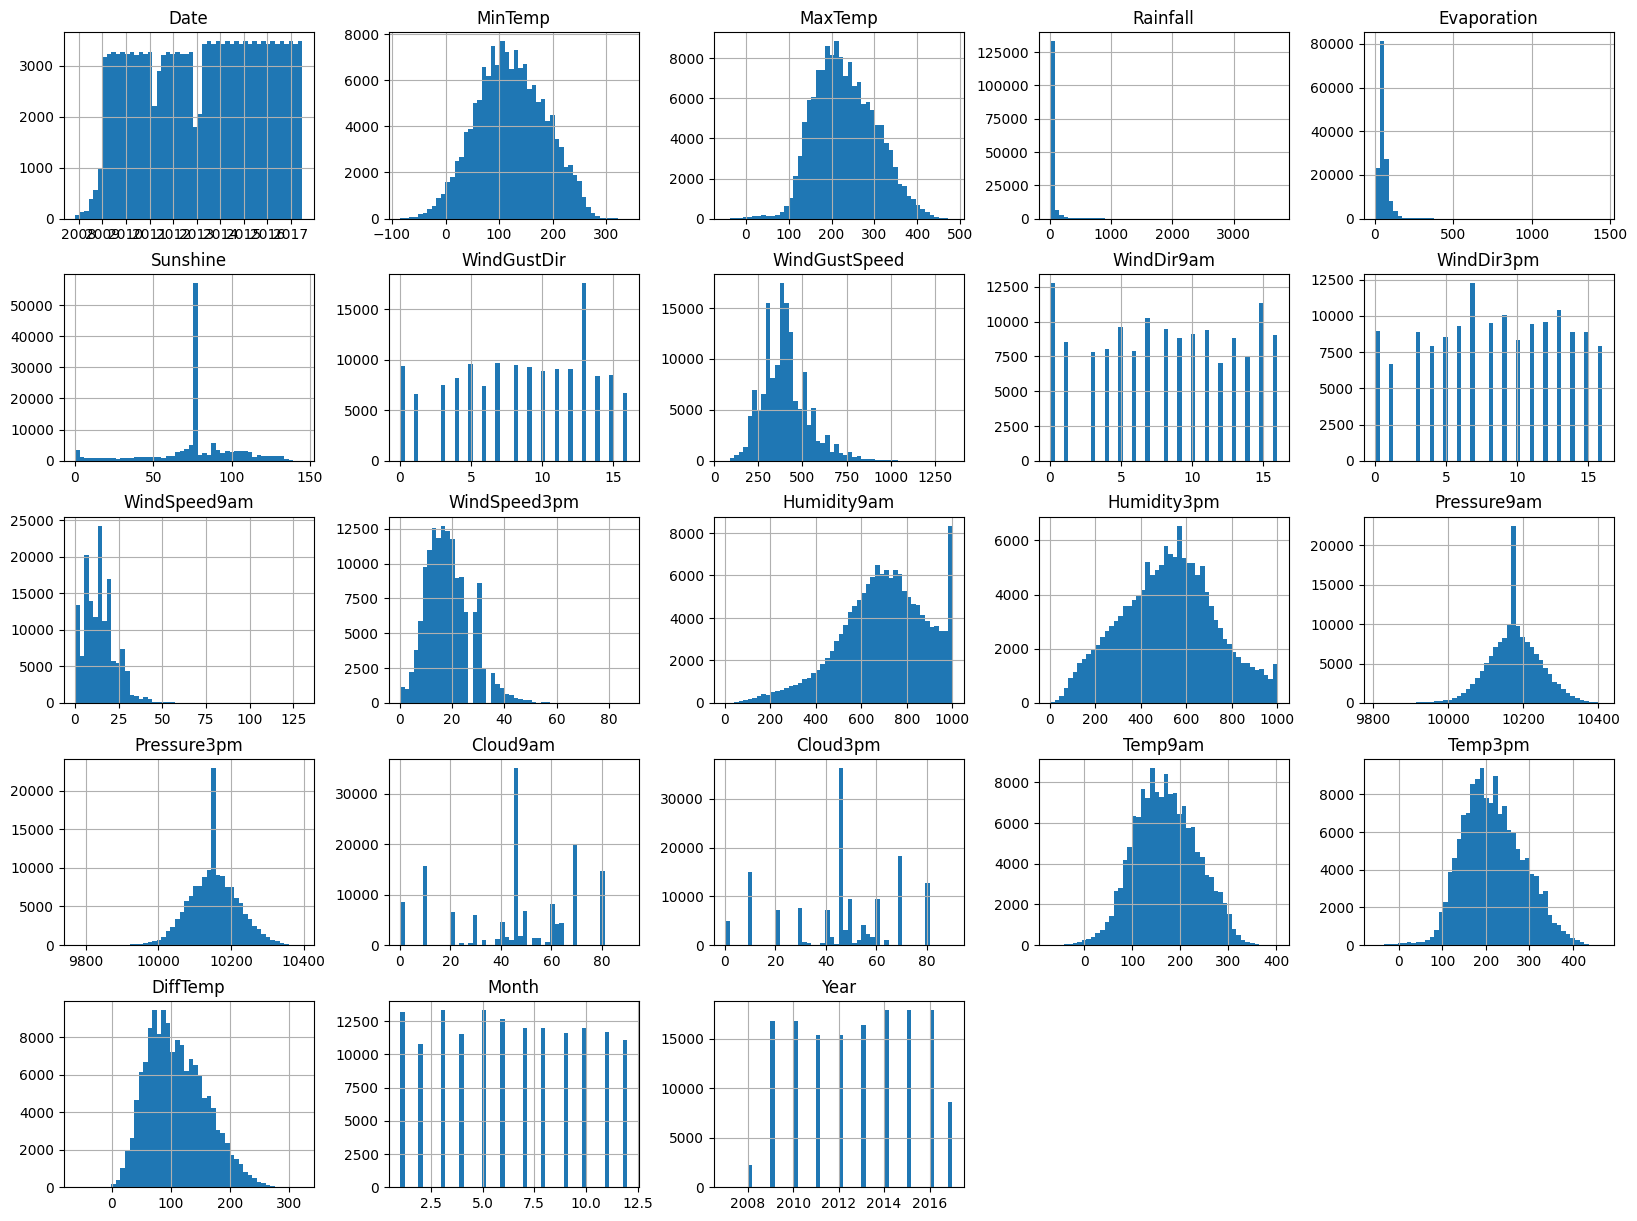

In [99]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [100]:
def analyzing(data, colomns):
    data_melted = data.melt(value_vars=colomns, var_name='Colomn', value_name='Value')

    plt.figure(figsize=(12, 9))
    sns.boxplot(x='Colomn', y='Value', data=data_melted)
    plt.grid(True)
    plt.show()

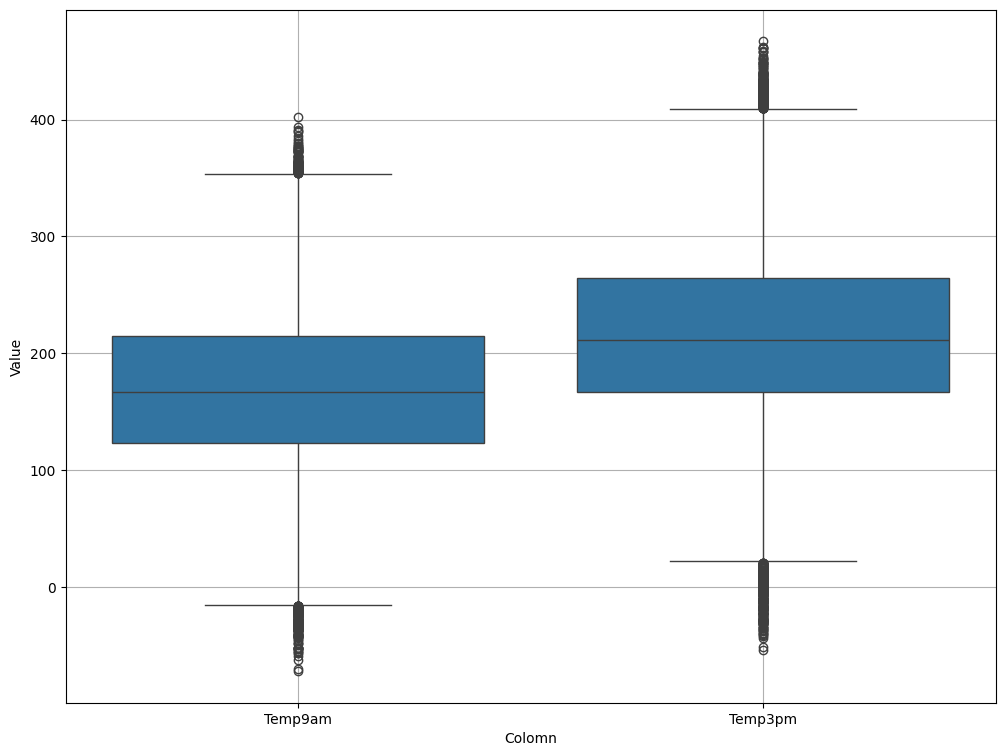

In [101]:
analyzing(data, colomns=['Temp9am', 'Temp3pm'])

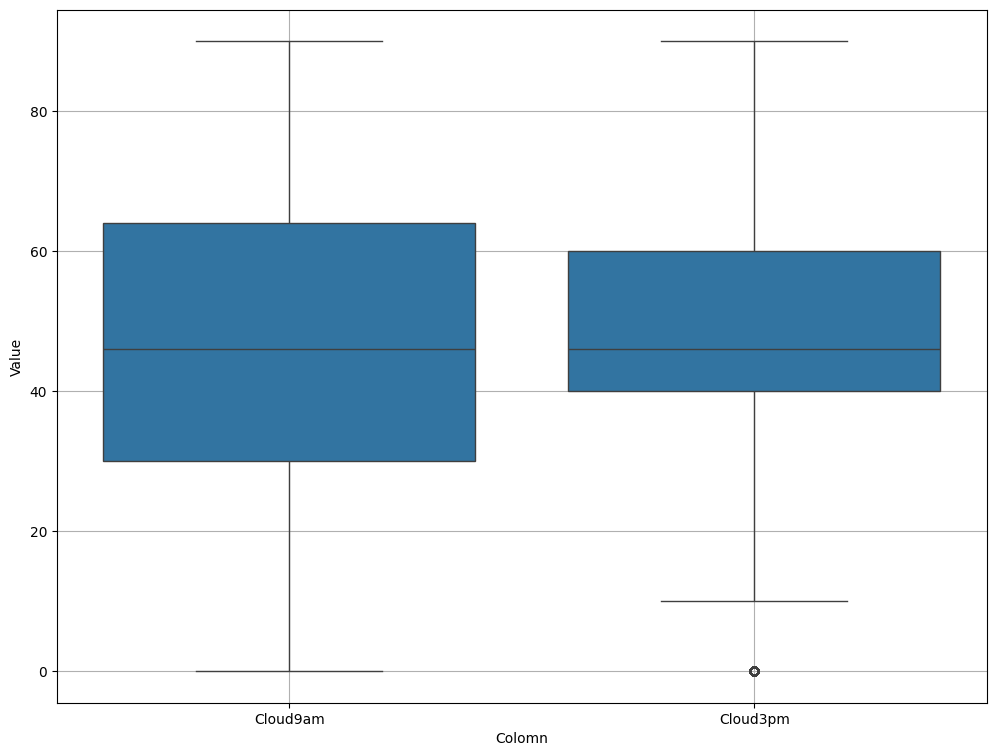

In [102]:
analyzing(data, colomns=['Cloud9am', 'Cloud3pm'])

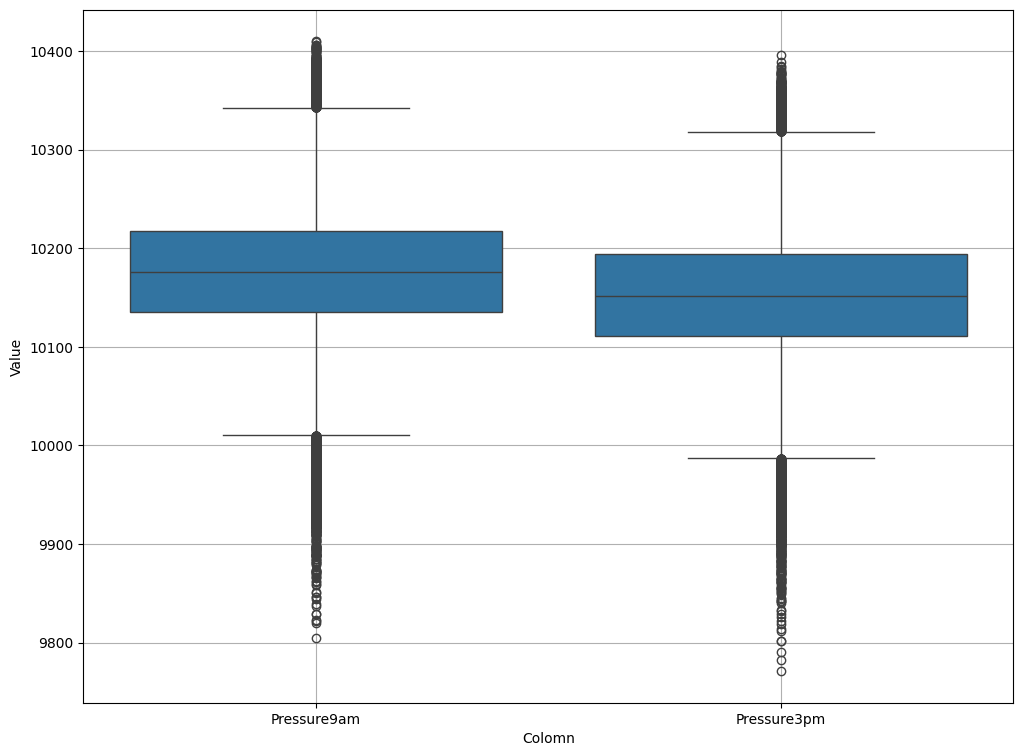

In [103]:
analyzing(data, colomns=['Pressure9am', 'Pressure3pm'])

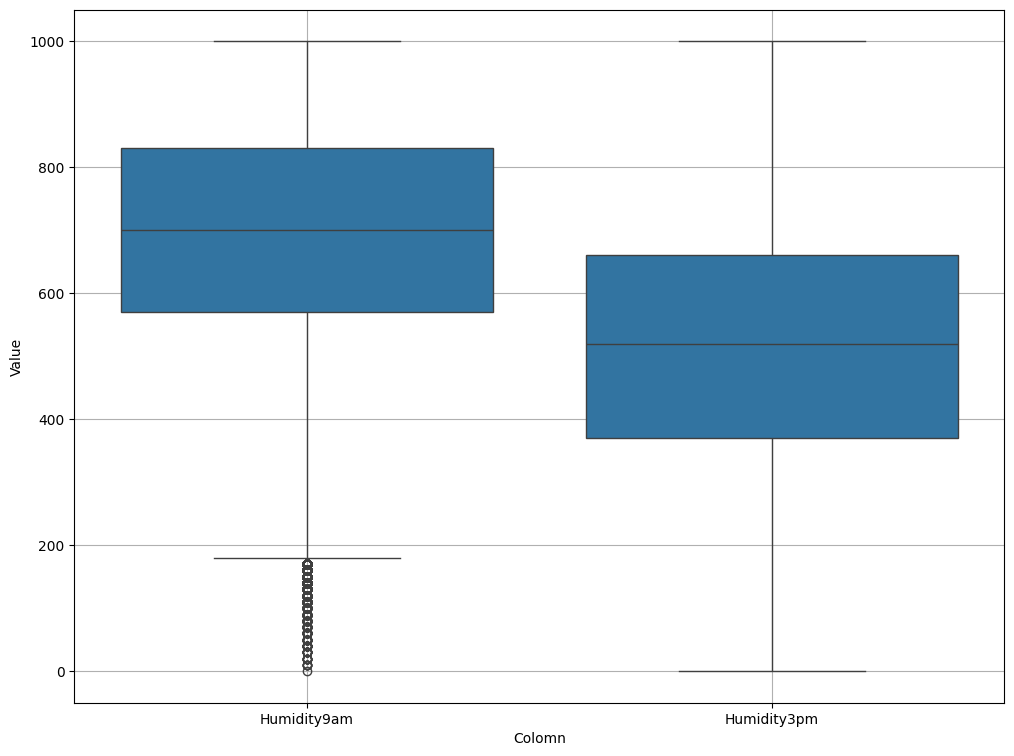

In [104]:
analyzing(data, colomns=['Humidity9am', 'Humidity3pm'])

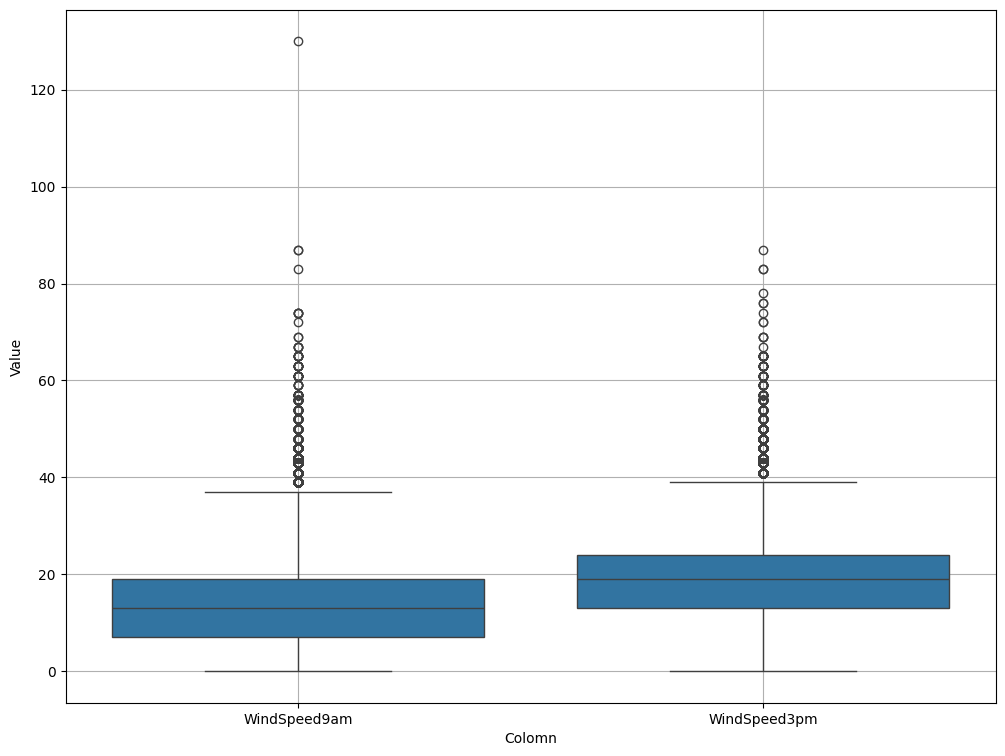

In [105]:
analyzing(data, colomns=['WindSpeed9am', 'WindSpeed3pm'])

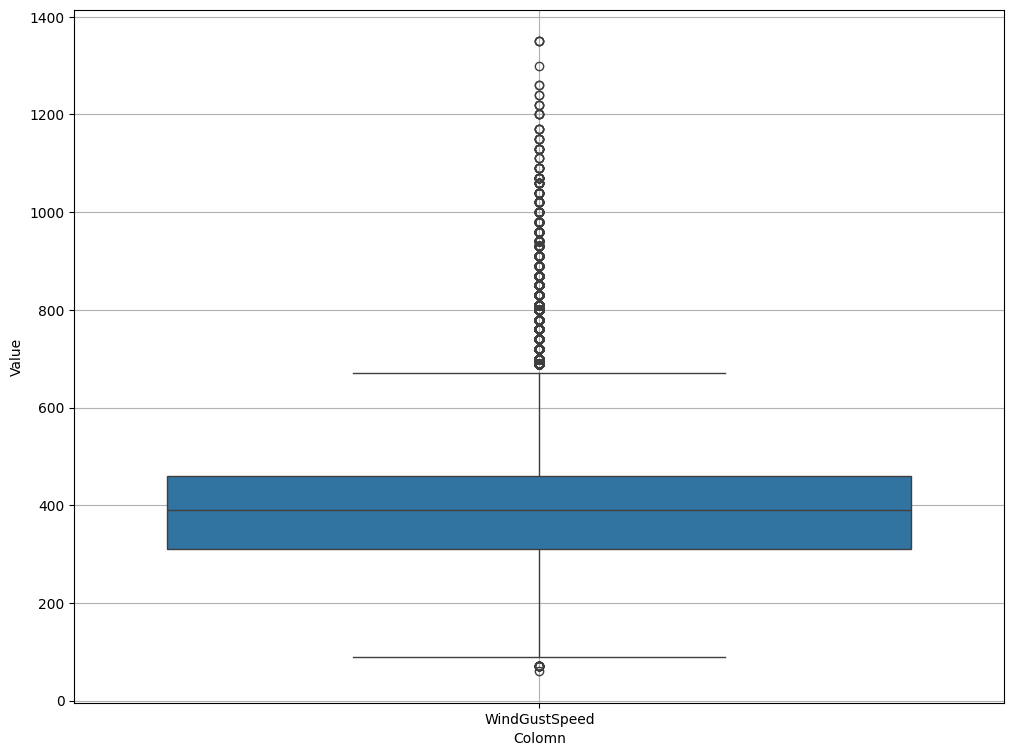

In [106]:
analyzing(data, colomns=['WindGustSpeed'])

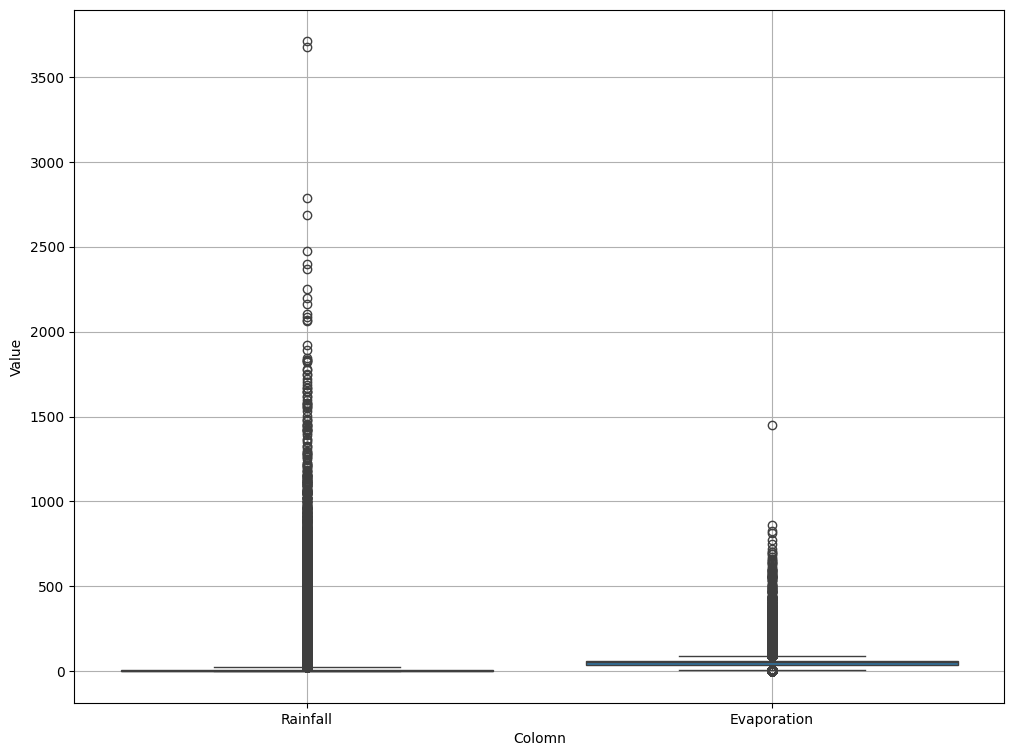

In [107]:
analyzing(data, colomns=['Rainfall', 'Evaporation'])

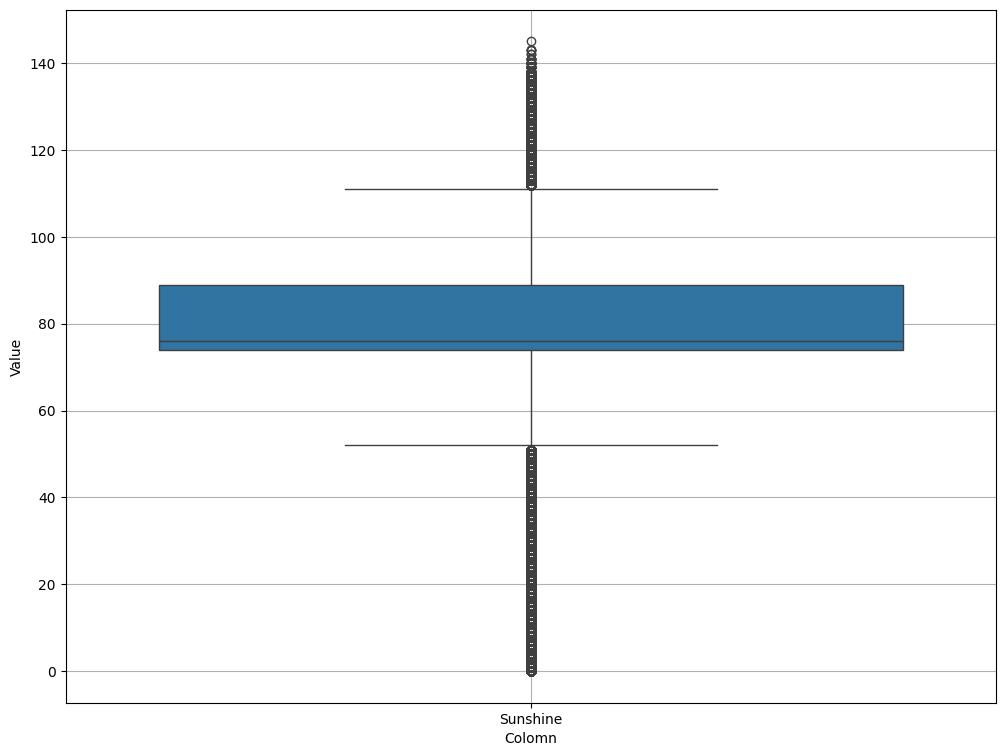

In [108]:
analyzing(data, colomns=['Sunshine'])

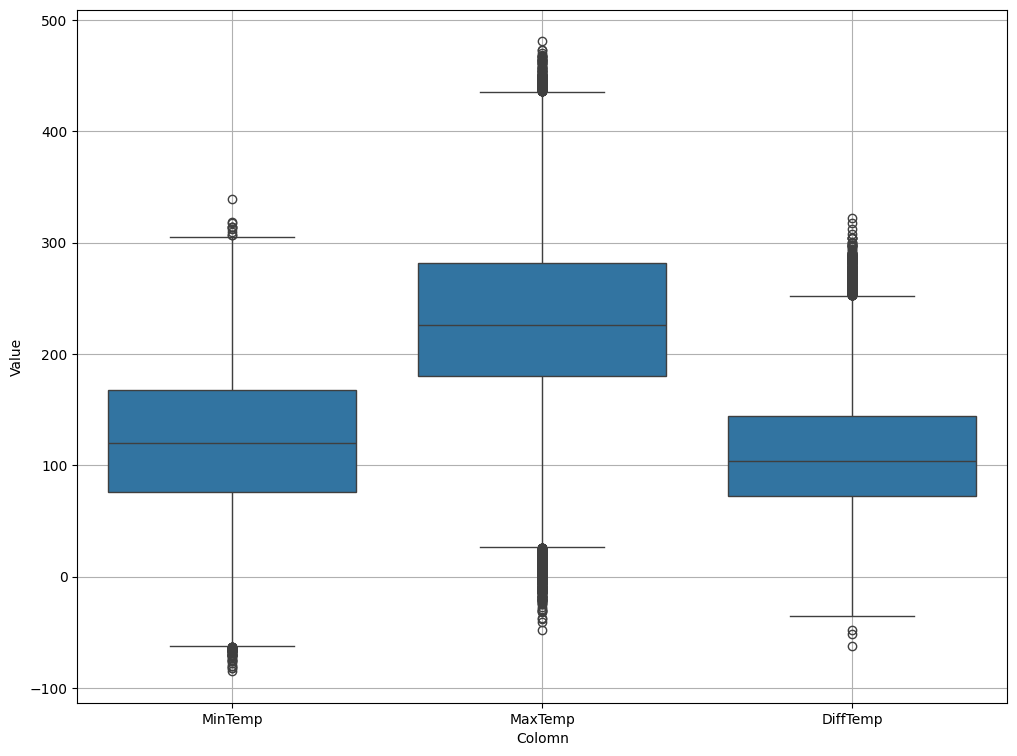

In [109]:
analyzing(data, colomns=['MinTemp', 'MaxTemp', 'DiffTemp'])

In [110]:
def get_border_data(dataframe, colomn):
    Q1= dataframe[colomn].quantile(0.25)
    Q3 = dataframe[colomn].quantile(0.75) 

    IQR = Q3 - Q1 

    low_bound = Q1 - 1.5 * IQR
    up_bound = Q3 + 1.5 * IQR
    
    return [low_bound, up_bound]

In [111]:
def filtered(dataframe, args):
    filtered_df = dataframe.copy()
    for column in args:
        low_bound, up_bound = get_border_data(filtered_df, column)
                
        filtered_df = filtered_df[
            (filtered_df[column] >= low_bound) & 
            (filtered_df[column] <= up_bound)]
    
    return filtered_df


In [112]:
def aim_filtered(dataframe, args, low_bound, up_bound):
    filtered_df = dataframe.copy()
    for column in args:
        filtered_df = filtered_df[
            (filtered_df[column] >= low_bound) & 
            (filtered_df[column] <= up_bound)]
        
    return filtered_df


In [113]:
filteredata = filtered(data, args= ['WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Humidity9am','Pressure9am', 'Pressure3pm', 'Cloud3pm', 'MinTemp', 'MaxTemp','DiffTemp'])



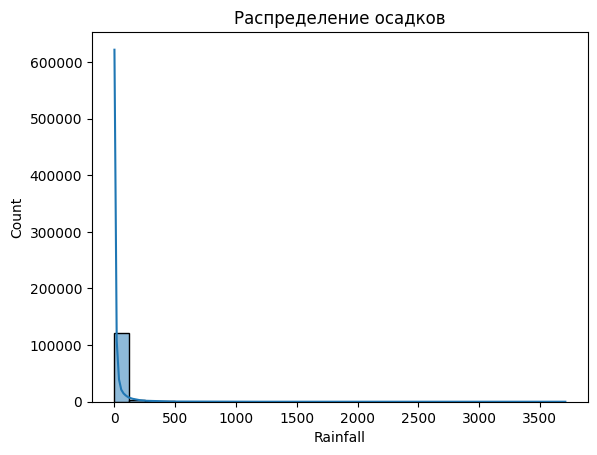

In [114]:
sns.histplot(filteredata['Rainfall'], bins=30, kde=True)
plt.title('Распределение осадков')
plt.show()

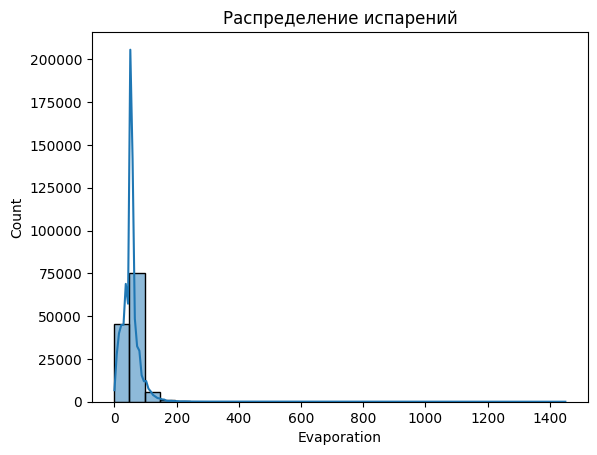

In [115]:
sns.histplot(filteredata['Evaporation'], bins=30, kde=True)
plt.title('Распределение испарений')
plt.show()

In [116]:
filteredata = aim_filtered(filteredata, args= ['Rainfall'], low_bound = 0, up_bound = 100)
filteredata = aim_filtered(filteredata, args= ['Evaporation'], low_bound = 0, up_bound = 150)
filteredata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118900 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           118900 non-null  datetime64[ns]
 1   Location       118900 non-null  object        
 2   MinTemp        118900 non-null  int64         
 3   MaxTemp        118900 non-null  int64         
 4   Rainfall       118900 non-null  int64         
 5   Evaporation    118900 non-null  int64         
 6   Sunshine       118900 non-null  int64         
 7   WindGustDir    118900 non-null  int64         
 8   WindGustSpeed  118900 non-null  int64         
 9   WindDir9am     118900 non-null  int64         
 10  WindDir3pm     118900 non-null  int64         
 11  WindSpeed9am   118900 non-null  int64         
 12  WindSpeed3pm   118900 non-null  int64         
 13  Humidity9am    118900 non-null  int64         
 14  Humidity3pm    118900 non-null  int64         
 15  Press

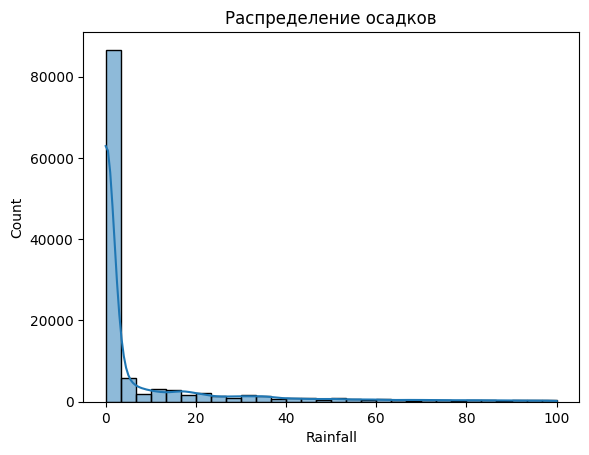

In [117]:
sns.histplot(filteredata['Rainfall'], bins=30, kde=True)
plt.title('Распределение осадков')
plt.show()

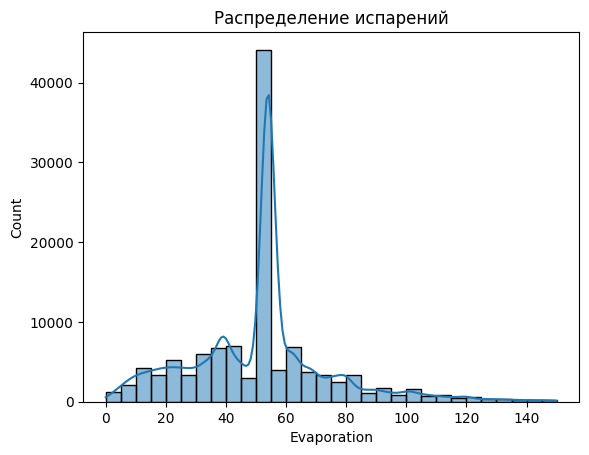

In [118]:
sns.histplot(filteredata['Evaporation'], bins=30, kde=True)
plt.title('Распределение испарений')
plt.show()

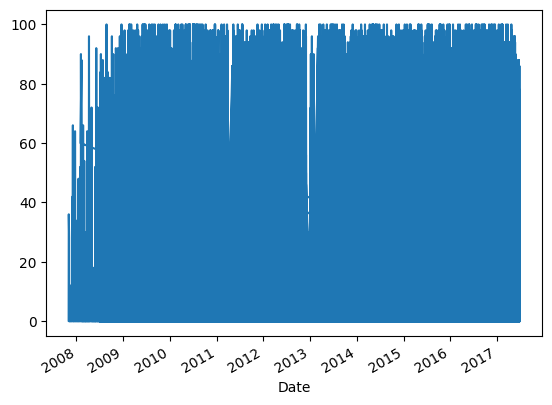

In [119]:
filteredata.set_index('Date', inplace=True)
filteredata['Rainfall'].plot()
plt.show()

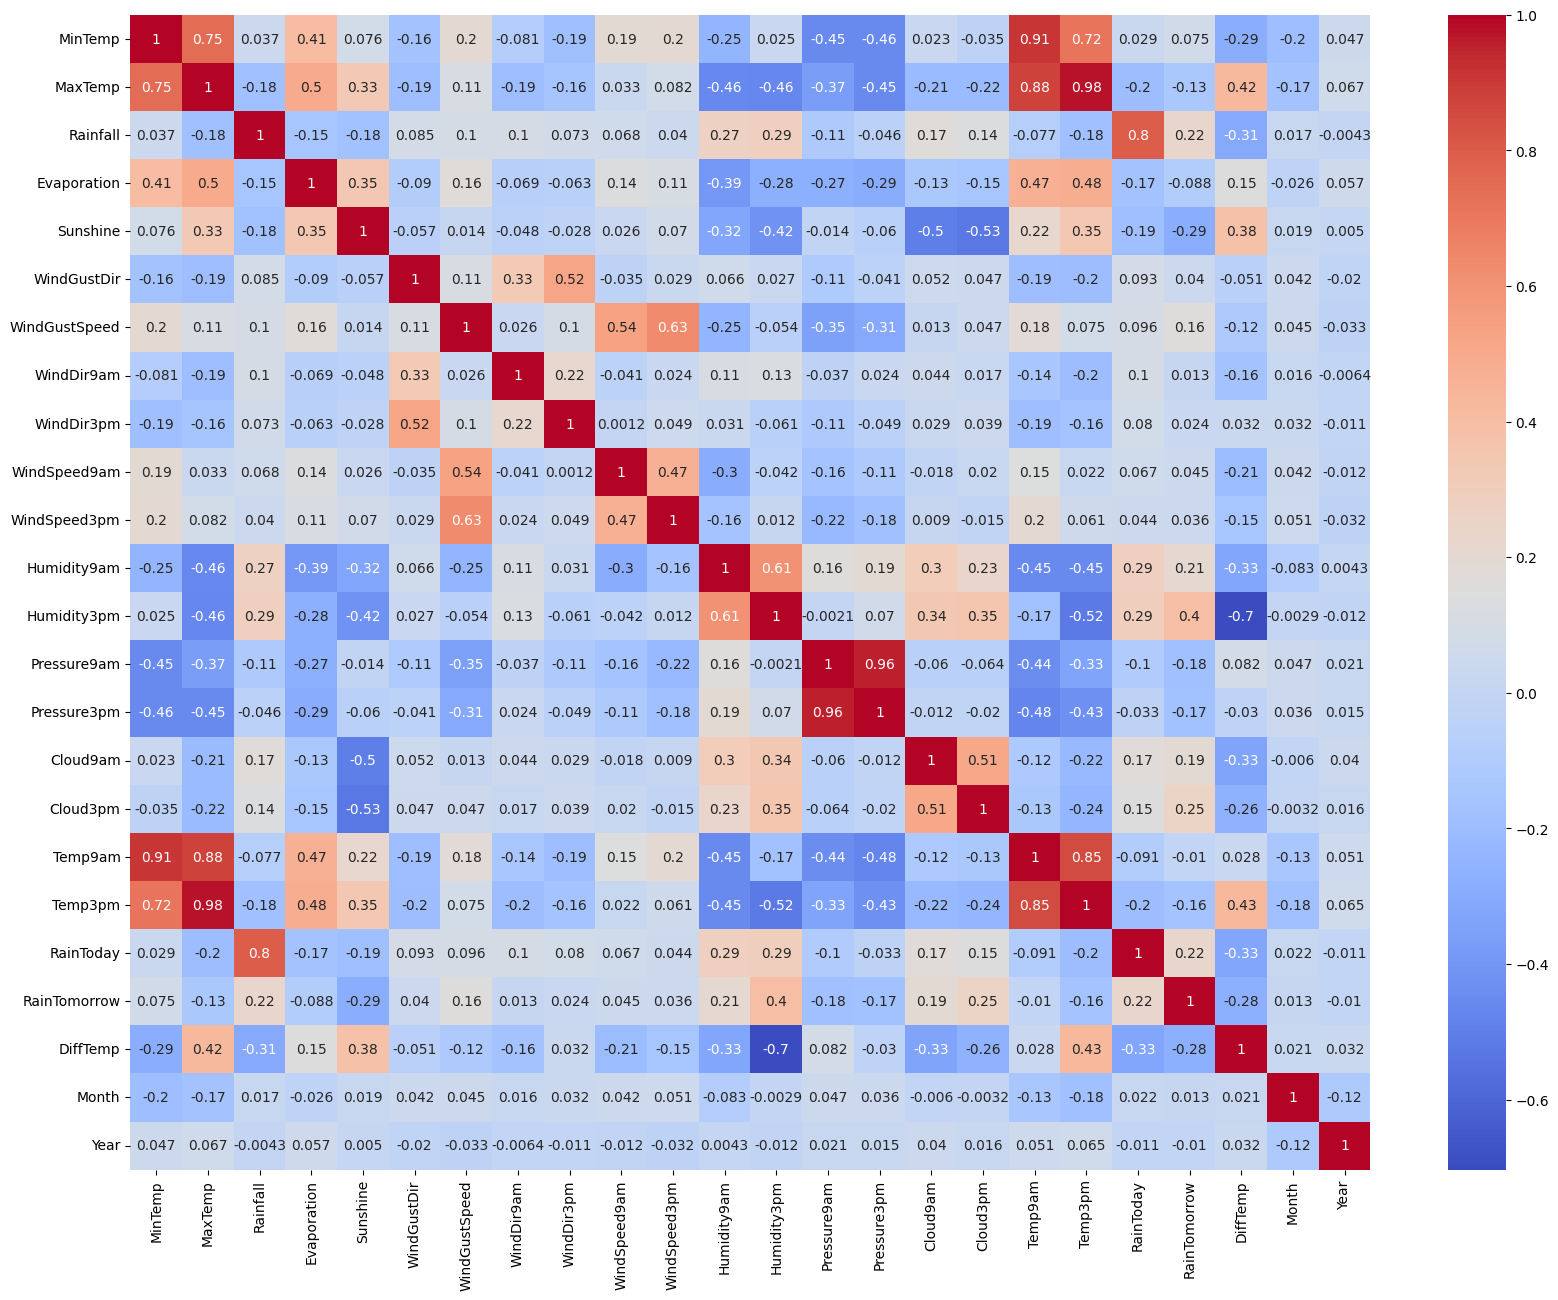

In [121]:
nonNumericColomns = filteredata.select_dtypes(exclude=['int', 'float', 'bool']).columns
normal = filteredata.drop(columns=nonNumericColomns)
corr_matrix = normal.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
filteredata['RainToday'].value_counts()

RainToday
False    98849
True     20051
Name: count, dtype: int64

Text(0.5, 1.0, 'Разность температур')

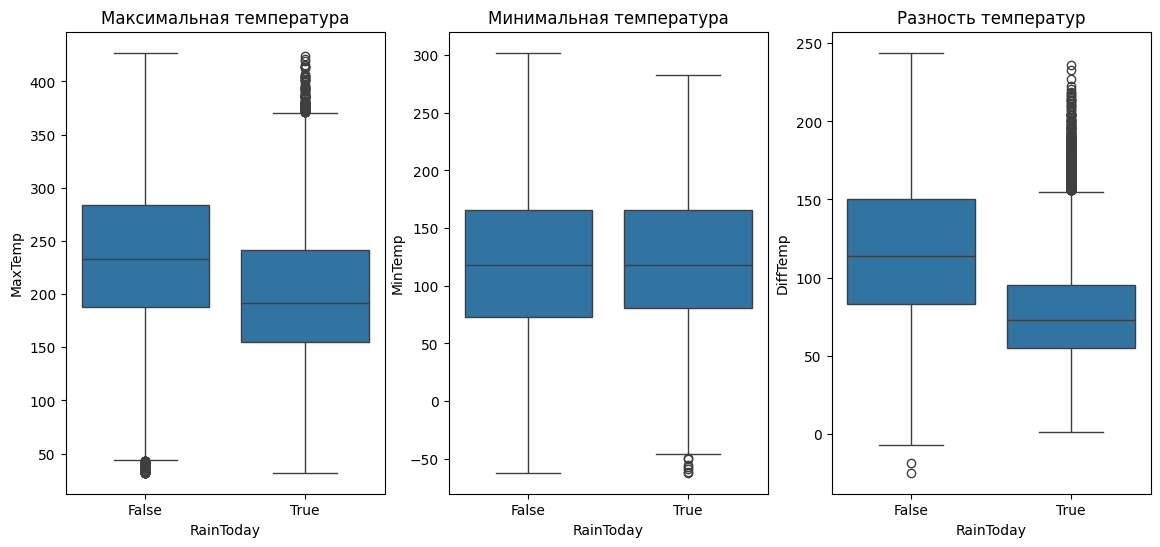

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='RainToday', y='MaxTemp', data=filteredata)
axes[0].set_title('Максимальная температура')

sns.boxplot(ax=axes[1], x='RainToday', y='MinTemp', data=filteredata)
axes[1].set_title('Минимальная температура')

sns.boxplot(ax=axes[2], x='RainToday', y='DiffTemp', data=filteredata)
axes[2].set_title('Разность температур')


Text(0.5, 1.0, 'Испарения в 3 вечера')

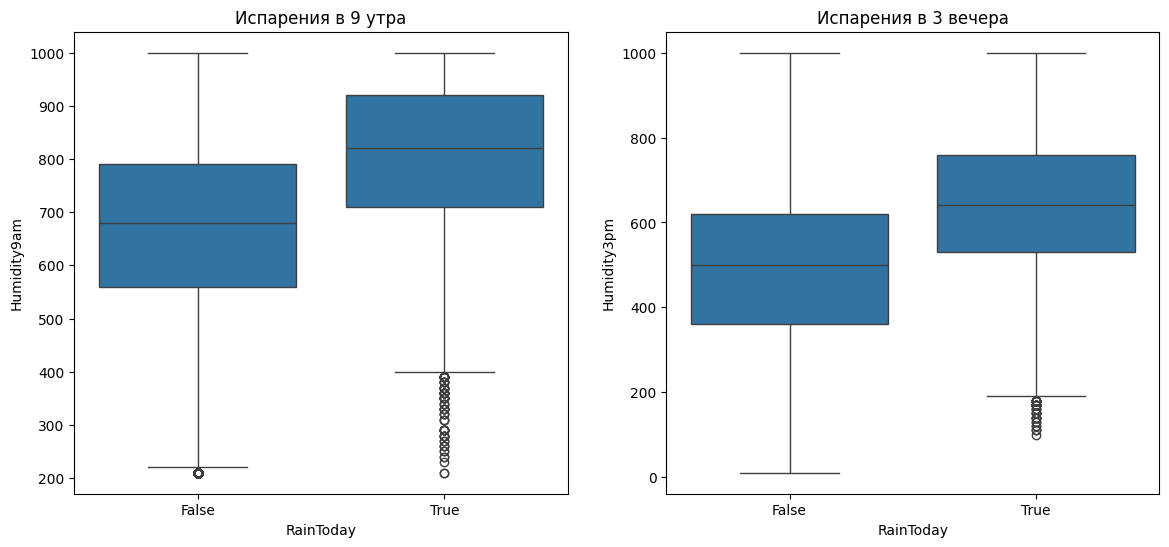

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='RainToday', y='Humidity9am', data=filteredata)
axes[0].set_title('Испарения в 9 утра')

sns.boxplot(ax=axes[1], x='RainToday', y='Humidity3pm', data=filteredata)
axes[1].set_title('Испарения в 3 вечера')

Text(0.5, 1.0, 'Облачность в 3 вечера')

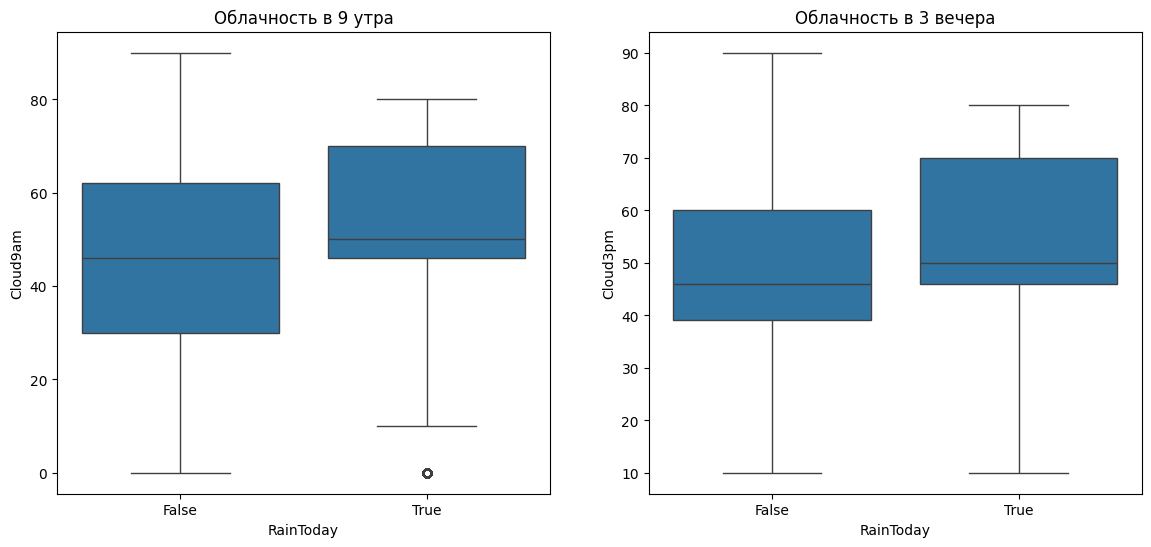

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='RainToday', y='Cloud9am', data=filteredata)
axes[0].set_title('Облачность в 9 утра')

sns.boxplot(ax=axes[1], x='RainToday', y='Cloud3pm', data=filteredata)
axes[1].set_title('Облачность в 3 вечера')

Text(0.5, 1.0, 'Давление в 3 вечера')

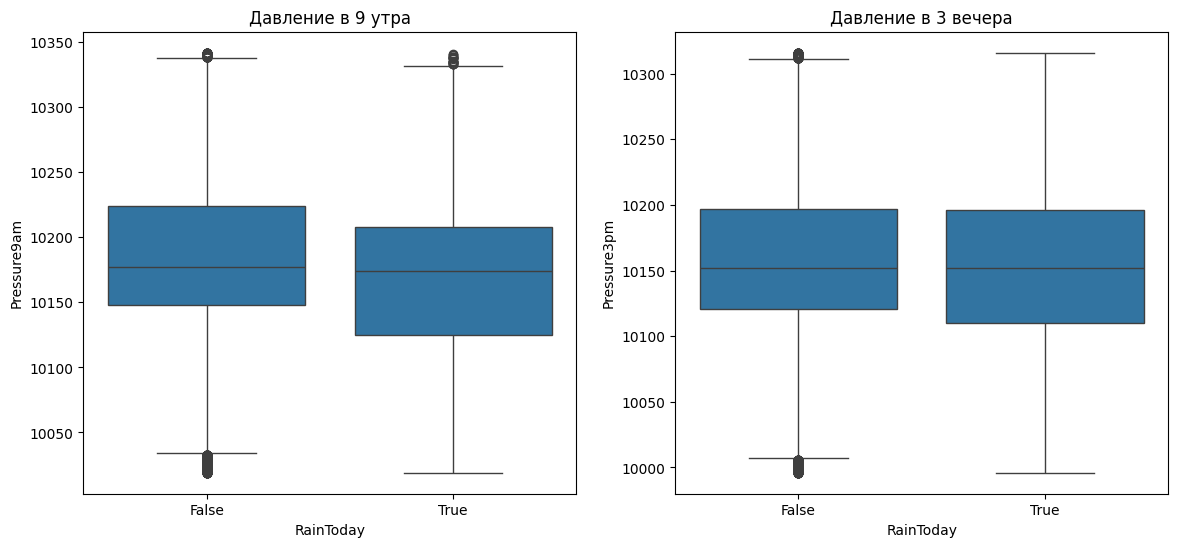

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='RainToday', y='Pressure9am', data=filteredata)
axes[0].set_title('Давление в 9 утра')

sns.boxplot(ax=axes[1], x='RainToday', y='Pressure3pm', data=filteredata)
axes[1].set_title('Давление в 3 вечера')

RainToday    False  True 
WindGustDir              
0             6545    944
1             5131    619
3             5921    661
4             6329    790
5             7053    871
6             5284    805
7             6871   1222
8             6478   1267
9             6010   1488
10            5562   1610
11            5740   1695
12            5553   1671
13           10971   3085
14            5211   1346
15            5547   1174
16            4643    803


Text(0.5, 1.0, 'Направление ветра в дождливые и недождливые дни')

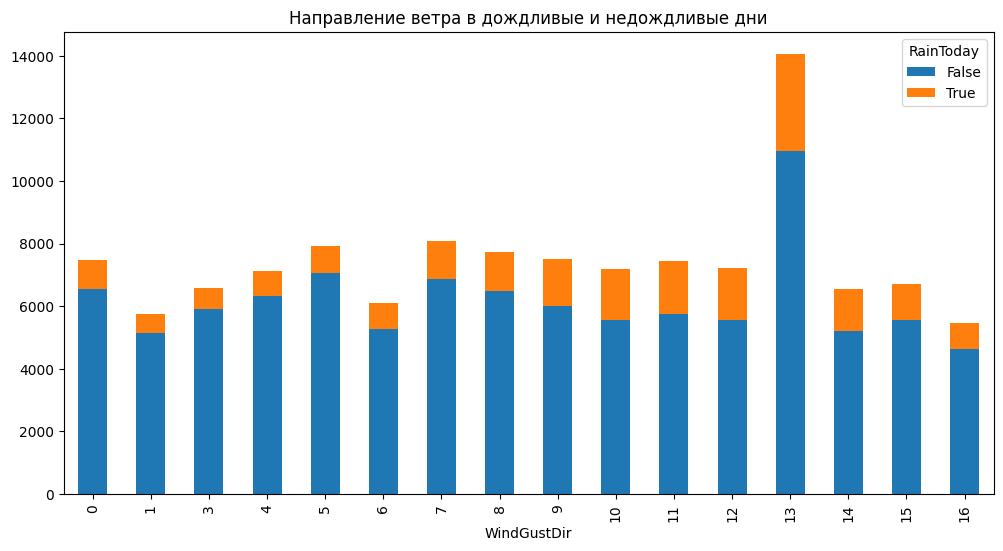

In [ ]:
wind_dir_rain = filteredata.groupby(['WindGustDir', 'RainToday']).size().unstack()
print(wind_dir_rain)
wind_dir_rain.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Направление ветра в дождливые и недождливые дни')

Text(0.5, 1.0, 'Скорость порыва ветра в 3 вечера')

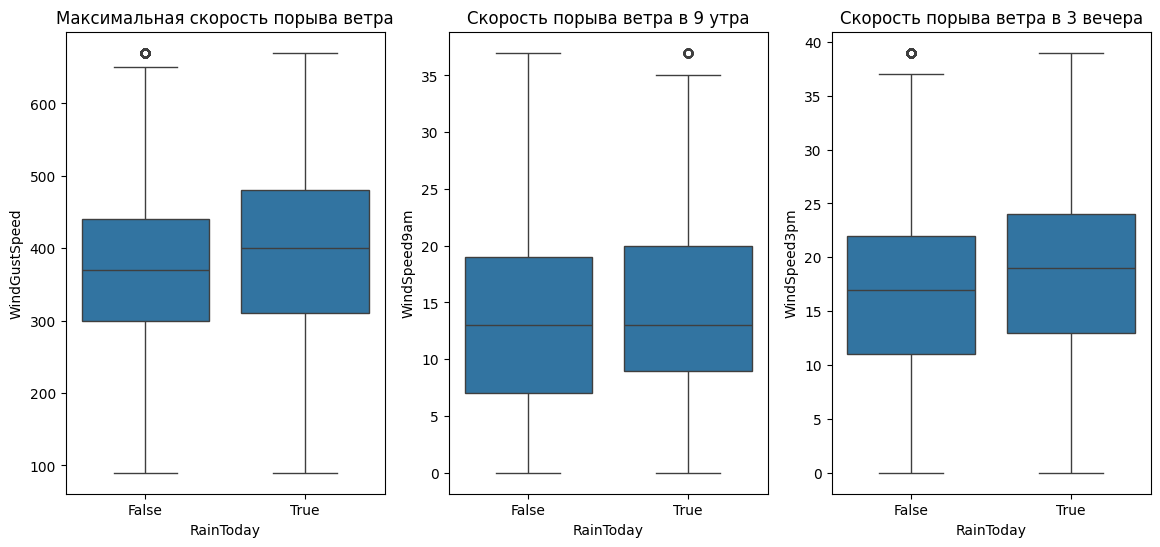

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.boxplot(ax=axes[0], x='RainToday', y='WindGustSpeed', data=filteredata)
axes[0].set_title('Максимальная скорость порыва ветра')

sns.boxplot(ax=axes[1], x='RainToday', y='WindSpeed9am', data=filteredata)
axes[1].set_title('Скорость порыва ветра в 9 утра')

sns.boxplot(ax=axes[2], x='RainToday', y='WindSpeed3pm', data=filteredata)
axes[2].set_title('Скорость порыва ветра в 3 вечера')

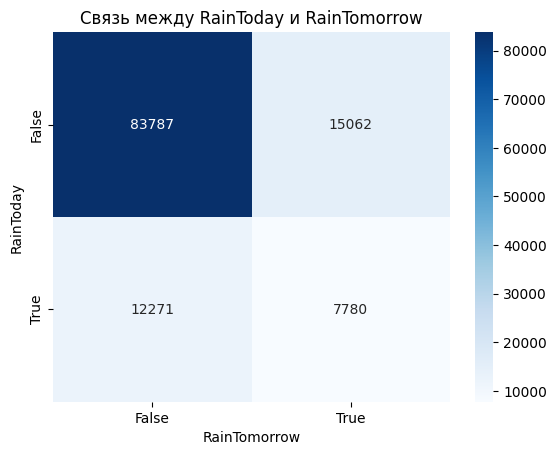

In [ ]:
contingency_table = pd.crosstab(filteredata['RainToday'], filteredata['RainTomorrow'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Связь между RainToday и RainTomorrow')
plt.show()